<a href="https://colab.research.google.com/github/RaghavPeri/ai-mvp-portfolio/blob/main/churn-intelligence-layer/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===== MODEL PERFORMANCE =====
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.67      0.62      0.64        13

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20



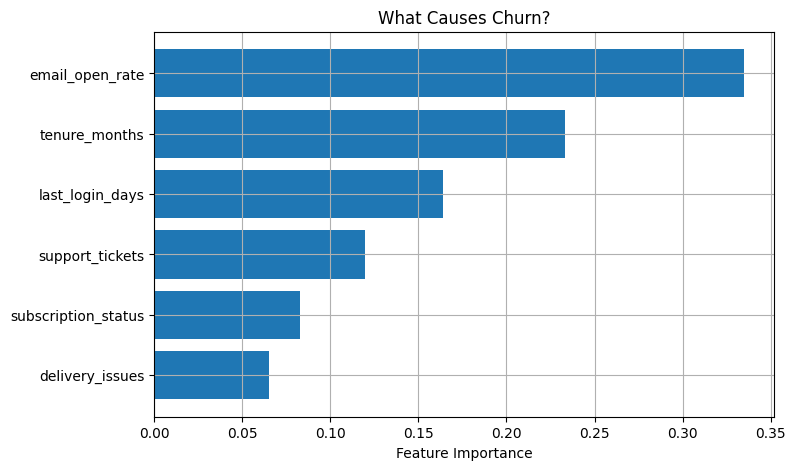

===== SAMPLE PREDICTIONS WITH NAMES =====
           name  last_login_days  support_tickets  email_open_rate  \
83  Customer_84               60                1         0.953072   
53  Customer_54               60                0         0.018075   
70  Customer_71                1                0         0.645103   
45  Customer_46                1                3         0.940133   
44  Customer_45                7                3         0.372283   

    subscription_status  tenure_months  delivery_issues  Actual  Predicted  \
83                    1              3                1       1          0   
53                    0              8                0       0          1   
70                    2              9                1       0          1   
45                    1              1                1       0          1   
44                    1              1                0       0          1   

                  Action  
83     Keep regular flow  
53  Send reten

In [3]:
# CHURN DATASET EXPLAINED
# Each row = a customer
# Feature description:
# - last_login_days: Days since their last session
# - support_tickets: Number of support tickets in past 30 days
# - email_open_rate: % of marketing emails opened recently
# - subscription_status: 0=active, 1=paused, 2=cancelled
# - tenure_months: How long they've been a customer
# - delivery_issues: Whether they've had delivery problems (1 = yes)
# - churn: 0 = stayed, 1 = churned

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 2: Create dummy churn dataset
np.random.seed(42)
num_rows = 100

# Add fake customer names
names = [f"Customer_{i+1}" for i in range(num_rows)]

data = {
    "name": names,
    "last_login_days": np.random.choice([1, 7, 14, 30, 60], num_rows),
    "support_tickets": np.random.choice([0, 1, 2, 3, 4], num_rows),
    "email_open_rate": np.random.uniform(0, 1, num_rows),
    "subscription_status": np.random.choice(["active", "paused", "cancelled"], num_rows),
    "tenure_months": np.random.randint(1, 24, num_rows),
    "delivery_issues": np.random.choice([0, 1], num_rows),
    "churn": np.random.choice([0, 1], num_rows)  # 0 = stayed, 1 = churned
}

df = pd.DataFrame(data)

# Step 3: Convert categorical to numeric
df['subscription_status'] = df['subscription_status'].map({'active': 0, 'paused': 1, 'cancelled': 2})

# Step 4: Split into features and target
X = df.drop(columns=['churn', 'name'])  # Exclude non-numeric string columns
y = df['churn']


# Step 5: Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print("===== MODEL PERFORMANCE =====")
print(classification_report(y_test, y_pred))

# Step 8: Feature importance
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importance)

plt.figure(figsize=(8, 5))
plt.barh(features[sorted_idx], importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("What Causes Churn?")
plt.grid(True)
plt.show()

# Step 9: Show a few predictions
pred_df = X_test.copy()
pred_df['Actual'] = y_test
pred_df['Predicted'] = y_pred

# Get names back from original df using index match
pred_df['name'] = df.loc[pred_df.index, 'name']

# Reorder columns for better readability
cols_order = ['name'] + list(X.columns) + ['Actual', 'Predicted']
pred_df = pred_df[cols_order]

# Add business recommendation
pred_df['Action'] = pred_df['Predicted'].apply(lambda x: "Send retention offer" if x == 1 else "Keep regular flow")

# Show results
print("===== SAMPLE PREDICTIONS WITH NAMES =====")
print(pred_df.head())